<a href="https://colab.research.google.com/github/israelklink/Financas_Descentralizadas_Python/blob/main/Uniswap_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install uniswap-python
!pip install UniswapPy
# !pip install pymc3
!pip install git+https://github.com/pymc-devs/pymc3
!pip install git clone https://github.com/defipy-devs/defipy
!pip install dune-client
!pip install pyodbc

  Cloning https://github.com/pymc-devs/pymc3 to /tmp/pip-req-build-95kj3ypj
  Running command git clone --filter=blob:none --quiet https://github.com/pymc-devs/pymc3 /tmp/pip-req-build-95kj3ypj
  Resolved https://github.com/pymc-devs/pymc3 to commit 794b5b865db0cab084bfb75ae627dfd540238253
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     - 305.9 kB 25.5 MB/s 0:00:00
  ERROR: Cannot unpack file /tmp/pip-unpack-o_e6wsyz/defipy (downloaded from /tmp/pip-req-build-2s0btdim, content-type: text/html; charset=utf-8); cannot detect archive format
ERROR: Cannot determine archive format of /tmp/pip-req-build-2s0btdim


In [ ]:
from uniswappy import *
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
user_nm = 'aluno'
eth_amount = 1000
dai_amount = 1000000

print("1 ETH é = ", dai_amount/eth_amount, "DAI")

1 ETH é =  1000.0 DAI


In [ ]:
dai = ERC20("DAI", "0x111")
eth = ERC20("ETH", "0x09")
exchg_data = UniswapExchangeData(tkn0 = eth, tkn1 = dai, symbol="LP", address="0x011")

factory = UniswapFactory("Pool de Liquidez ETH", "0x2")
lp = factory.deploy(exchg_data)
Join().apply(lp, user_nm, eth_amount, dai_amount)
lp.summary()

Exchange ETH-DAI (LP)
Reserves: ETH = 1000.0, DAI = 1000000.0
Liquidity: 31622.776601683792 



Swap por derivação da equação:

In [ ]:
dy = 1000 # Usuário envia 1000 DAI

gamma = 997/1000  # gama (fee) = 1- 0.003 = 997/1000

x = lp.get_reserve(eth)
y = lp.get_reserve(dai)

dx = (gamma*x*dy)/(y + gamma*dy)

print(f'Recebemos {dx:.5f} ETH para {dy} DAI')

Recebemos 0.99601 ETH para 1000 DAI


Swap utilizando a biblioteca Uniswappy

In [ ]:
# dy é a quantidade enviada pelo usuário
out = Swap().apply(lp, dai, user_nm, dy)
lp.summary()

print(f'Recebemos {out:.5f} ETH para {dy} DAI')

Exchange ETH-DAI (LP)
Reserves: ETH = 999.00399301896, DAI = 1001000.0
Liquidity: 31622.776601683792 

Recebemos 0.99601 ETH para 1000 DAI


(992000.0, 1008000.0)

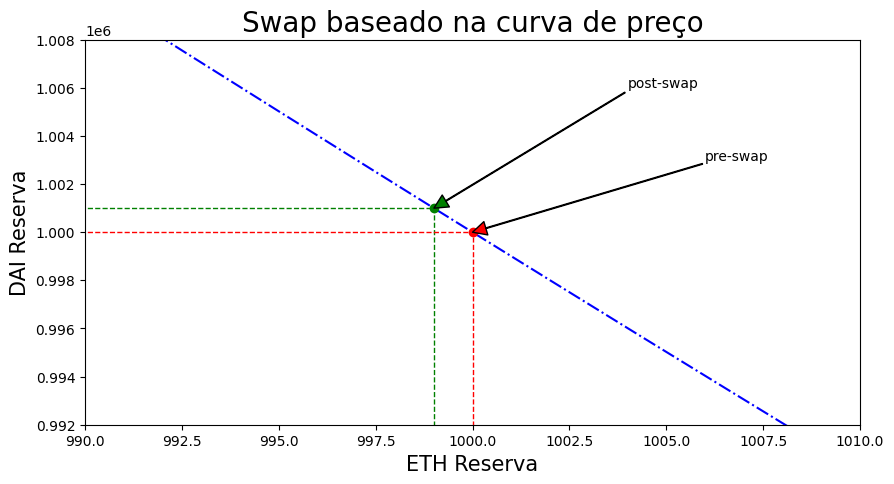

In [ ]:
L = lp.get_liquidity()
x2 = lp.get_reserve(eth)
y2 = lp.get_reserve(dai)

x_arr = np.arange(990, 1010, 0.01)
y_arr = L**2/x_arr

fig, (ax) = plt.subplots(nrows=1, sharex=False, sharey=False, figsize=(10, 5))
ax.plot(x_arr, y_arr, color = 'b',linestyle = 'dashdot', label='initial invest')
ax.plot(x, y, 'ro', color='r')
ax.plot(x2, y2, 'ro', color='g')

ax.hlines(y=y2, xmin=0, xmax=x2, linewidth=1, color='g', linestyle = 'dashed')
ax.vlines(x = x2, ymin=0, ymax=y2, linewidth=1, color='g', linestyle = 'dashed')

ax.hlines(y= y, xmin=0, xmax=x, linewidth=1, color='r', linestyle = 'dashed')
ax.vlines(x = x, ymin=0, ymax=y, linewidth=1, color='r', linestyle = 'dashed')

ax.annotate('post-swap', xy=(x2, y2),xytext=(x2+5, y2+5000), arrowprops=dict(facecolor='green',width=0.5,headwidth=10,headlength=10))
ax.annotate('pre-swap', xy=(x, y),xytext=(x2+7, y2+2000), arrowprops=dict(facecolor='red',width=0.5,headwidth=10,headlength=10))

ax.set_title(f'Swap baseado na curva de preço', fontsize=20)
ax.set_ylabel(f'{dai.token_name} Reserva', size=15)
ax.set_xlabel(f'{eth.token_name} Reserva', size=15)
ax.set_xlim((990,1010))
ax.set_ylim((992000,1008000))

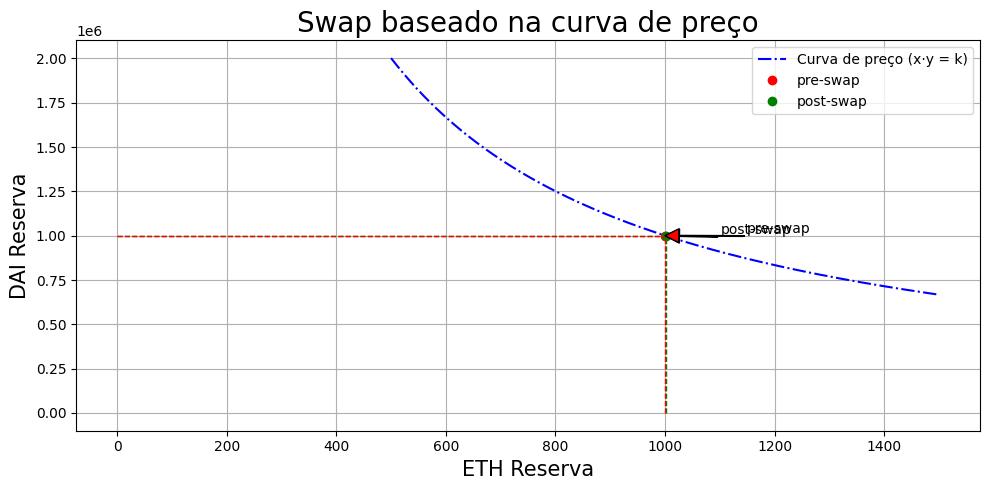

In [ ]:
# Intervalo ampliado para mostrar curvatura
x_arr = np.linspace(500, 1500, 1000)
y_arr = L**2 / x_arr

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_arr, y_arr, color='b', linestyle='dashdot', label='Curva de preço (x·y = k)')
ax.plot(x, y, 'ro', label='pre-swap')
ax.plot(x2, y2, 'go', label='post-swap')

ax.hlines(y=y2, xmin=0, xmax=x2, linewidth=1, color='g', linestyle='dashed')
ax.vlines(x=x2, ymin=0, ymax=y2, linewidth=1, color='g', linestyle='dashed')
ax.hlines(y=y, xmin=0, xmax=x, linewidth=1, color='r', linestyle='dashed')
ax.vlines(x=x, ymin=0, ymax=y, linewidth=1, color='r', linestyle='dashed')

ax.annotate('post-swap', xy=(x2, y2), xytext=(x2+100, y2+10000),
            arrowprops=dict(facecolor='green', width=0.5, headwidth=10, headlength=10))
ax.annotate('pre-swap', xy=(x, y), xytext=(x+150, y+15000),
            arrowprops=dict(facecolor='red', width=0.5, headwidth=10, headlength=10))

ax.set_title('Swap baseado na curva de preço', fontsize=20)
ax.set_ylabel(f'{dai.token_name} Reserva', size=15)
ax.set_xlabel(f'{eth.token_name} Reserva', size=15)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# import plotly.graph_objects as go
# import numpy as np

# # Intervalo ampliado
# x_arr = np.linspace(500, 1500, 1000)
# y_arr = L**2 / x_arr

# fig = go.Figure()

# # Curva da função x·y = k
# fig.add_trace(go.Scatter(x=x_arr, y=y_arr, mode='lines',
#                          name='Curva de preço (x·y = k)',
#                          line=dict(color='blue', dash='dashdot')))

# # Ponto pré-swap
# fig.add_trace(go.Scatter(x=[x], y=[y], mode='markers',
#                          name='pre-swap',
#                          marker=dict(color='red', size=10)))

# # Ponto pós-swap
# fig.add_trace(go.Scatter(x=[x2], y=[y2], mode='markers',
#                          name='post-swap',
#                          marker=dict(color='green', size=10)))

# # Linhas auxiliares pós-swap
# fig.add_shape(type="line", x0=0, x1=x2, y0=y2, y1=y2,
#               line=dict(color="green", width=1, dash="dash"))
# fig.add_shape(type="line", x0=x2, x1=x2, y0=0, y1=y2,
#               line=dict(color="green", width=1, dash="dash"))

# # Linhas auxiliares pré-swap
# fig.add_shape(type="line", x0=0, x1=x, y0=y, y1=y,
#               line=dict(color="red", width=1, dash="dash"))
# fig.add_shape(type="line", x0=x, x1=x, y0=0, y1=y,
#               line=dict(color="red", width=1, dash="dash"))

# # Anotações
# fig.add_annotation(x=x2, y=y2,
#                    text="post-swap",
#                    showarrow=True,
#                    arrowhead=2,
#                    ax=100, ay=-100,
#                    font=dict(color='green'))

# fig.add_annotation(x=x, y=y,
#                    text="pre-swap",
#                    showarrow=True,
#                    arrowhead=2,
#                    ax=150, ay=-150,
#                    font=dict(color='red'))

# # Layout
# fig.update_layout(title='Swap baseado na curva de preço',
#                   xaxis_title=f'{eth.token_name} Reserva',
#                   yaxis_title=f'{dai.token_name} Reserva',
#                   legend=dict(x=0.01, y=0.99),
#                   width=900,
#                   height=500)

# fig.show()


In [ ]:
dai = ERC20("DAI", "0x111")
eth = ERC20("ETH", "0x09")
exchg_data = UniswapExchangeData(tkn0 = eth, tkn1 = dai, symbol="LP", address="0x011")

factory = UniswapFactory("Pool de Liquidez ETH", "0x2")
lp = factory.deploy(exchg_data)
Join().apply(lp, user_nm, eth_amount, dai_amount)
lp.summary()

Exchange ETH-DAI (LP)
Reserves: ETH = 1000.0, DAI = 1000000.0
Liquidity: 31622.776601683792 



Cálculo da retirada utilizando por derivação

In [ ]:
dx = 1
x = lp.get_reserve(eth)
y = lp.get_reserve(dai)
L = lp.get_liquidity()

In [ ]:
dL = dx*L/x
dy = y*dL/L
new_x = (x-dx)
new_y = (y-dy)
new_L = L-dL

print(f'As novas reservas são {new_x} ETH e {new_y} DAI, e a atualização do Liquidity {new_L:8f}')

As novas reservas são 999.0 ETH e 999000.0 DAI, e a atualização do Liquidity 31606.921732


Cálculo da retirada utilizando Uniswappy

In [ ]:
RemoveLiquidity().apply(lp, eth, user_nm, dx)
lp.summary()

Exchange ETH-DAI (LP)
Reserves: ETH = 999.0, DAI = 999000.0
Liquidity: 31591.15382508211 



In [ ]:
dai = ERC20("DAI", "0x111")
eth = ERC20("ETH", "0x09")
exchg_data = UniswapExchangeData(tkn0 = eth, tkn1 = dai, symbol="LP", address="0x011")

factory = UniswapFactory("ETH pool factory", "0x2")
lp = factory.deploy(exchg_data)
Join().apply(lp, user_nm, eth_amount, dai_amount)
lp.summary()

Exchange ETH-DAI (LP)
Reserves: ETH = 1000.0, DAI = 1000000.0
Liquidity: 31622.776601683792 



Cálculo da soma utilizando por derivação

In [ ]:
dx = 1
x = lp.get_reserve(eth)
y = lp.get_reserve(dai)
L = lp.get_liquidity()

In [ ]:
dL = dx*L/x
dy = y*dL/L
new_x = (x+dx)
new_y = (y+dy)
new_L = L+dL

print(f'The updated reserves are {new_x} ETH and {new_y} DAI, and the updated liquidity is {new_L:8f}')

The updated reserves are 1001.0 ETH and 1001000.0 DAI, and the updated liquidity is 31654.399378


Cálculo da soma utilizando Uniswappy

In [ ]:
AddLiquidity().apply(lp, eth, user_nm, dx)
lp.summary()

Exchange ETH-DAI (LP)
Reserves: ETH = 1001.0, DAI = 1001000.0
Liquidity: 31654.399378285478 



In [ ]:
dai = ERC20("DAI", "0x111")
eth = ERC20("ETH", "0x09")
exchg_data = UniswapExchangeData(tkn0 = eth, tkn1 = dai, symbol="LP", address="0x011")

factory = UniswapFactory("ETH pool factory", "0x2")
lp = factory.deploy(exchg_data)
Join().apply(lp, user_nm, eth_amount, dai_amount)
lp.summary()

Exchange ETH-DAI (LP)
Reserves: ETH = 1000.0, DAI = 1000000.0
Liquidity: 31622.776601683792 



In [ ]:
dy = 1
amount_out = WithdrawSwap().apply(lp, eth, user_nm, dy)
lp.summary()

Exchange ETH-DAI (LP)
Reserves: ETH = 999.0, DAI = 1000000.0
Liquidity: 31606.937511796754 



In [ ]:
dai = ERC20("DAI", "0x111")
eth = ERC20("ETH", "0x09")
exchg_data = UniswapExchangeData(tkn0 = eth, tkn1 = dai, symbol="LP", address="0x011")

factory = UniswapFactory("ETH pool factory", "0x2")
lp = factory.deploy(exchg_data)
Join().apply(lp, user_nm, eth_amount, dai_amount)
lp.summary()

Exchange ETH-DAI (LP)
Reserves: ETH = 1000.0, DAI = 1000000.0
Liquidity: 31622.776601683792 



In [ ]:
dy = 1
dep = SwapDeposit().apply(lp, eth, user_nm, dy)
lp.summary()

Exchange ETH-DAI (LP)
Reserves: ETH = 1001.0, DAI = 1000000.0
Liquidity: 31638.56029234534 

